In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("home_price_clean_processed_final.csv")
df.info()
print("\nMissing values in each column:")
print(df["Binanın_Yaşı"].unique())
print(df["Kullanım_Durumu"].unique())
print(df["Eşya_Durumu"].unique())
print(df["Takas"].unique())
print(df["Yatırıma_Uygunluk"].unique())
#print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20131 entries, 0 to 20130
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Net_Metrekare       20131 non-null  int64  
 1   Brüt_Metrekare      20131 non-null  float64
 2   Oda_Sayısı          20131 non-null  int64  
 3   Bulunduğu_Kat       20131 non-null  object 
 4   Eşya_Durumu         20131 non-null  object 
 5   Binanın_Yaşı        20131 non-null  object 
 6   Isıtma_Tipi         20131 non-null  object 
 7   Fiyat               20131 non-null  float64
 8   Şehir               20131 non-null  object 
 9   Binanın_Kat_Sayısı  20131 non-null  int64  
 10  Kullanım_Durumu     20131 non-null  object 
 11  Yatırıma_Uygunluk   20131 non-null  object 
 12  Takas               20131 non-null  object 
 13  Tapu_Durumu         20131 non-null  object 
 14  Banyo_Sayısı        20131 non-null  float64
dtypes: float64(3), int64(3), object(9)
memory usage: 2.3+

Before Encoding:

  Binanın_Yaşı Kullanım_Durumu Eşya_Durumu Takas Yatırıma_Uygunluk
0  21 Ve Üzeri             Boş      Eşyalı   Var        bilinmiyor
1            4             Boş         Boş   Var        bilinmiyor
2     0 (Yeni)             Boş         Boş   Var             Uygun
3     0 (Yeni)             Boş         Boş   Yok             Uygun
4         5-10             Boş         Boş   Yok             Uygun 

After Encoding:

   Binanın_Yaşı  Kullanım_Durumu  Eşya_Durumu  Takas  Yatırıma_Uygunluk
0          25.0                0            1      1                  0
1           4.0                0            0      1                  0
2           0.0                0            0      1                  1
3           0.0                0            0      0                  1
4           7.5                0            0      0                  1

Saved as: home_price_first_encode.csv


In [26]:
df = pd.read_csv("outlier_check_encoded.csv")
df.info()
print("\nMissing values in each column:")
print(df["Şehir"].unique())
print(df["Tapu_Durumu"].unique())
print(df["Isıtma_Tipi"].unique())
print(df["Bulunduğu_Kat"].unique())
#print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19978 entries, 0 to 19977
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Net_Metrekare       19978 non-null  int64  
 1   Brüt_Metrekare      19978 non-null  float64
 2   Oda_Sayısı          19978 non-null  int64  
 3   Bulunduğu_Kat       19978 non-null  object 
 4   Eşya_Durumu         19978 non-null  float64
 5   Binanın_Yaşı        0 non-null      float64
 6   Isıtma_Tipi         19978 non-null  object 
 7   Fiyat               19978 non-null  float64
 8   Şehir               19978 non-null  object 
 9   Binanın_Kat_Sayısı  19978 non-null  int64  
 10  Kullanım_Durumu     19978 non-null  float64
 11  Yatırıma_Uygunluk   19978 non-null  float64
 12  Takas               19978 non-null  float64
 13  Tapu_Durumu         19978 non-null  object 
 14  Banyo_Sayısı        19978 non-null  float64
 15  Şehir_FE            19978 non-null  float64
 16  Isıt

In [ ]:
import pandas as pd
import re

df = pd.read_csv("home_price_cleaned.csv")

print("Before Encoding:\n")
print(df[["Binanın_Yaşı", "Kullanım_Durumu", "Eşya_Durumu", "Takas"]].head(), "\n")

# ============================================================
# DEBUG: Check unique values in Binanın_Yaşı
# ============================================================
print("Unique values in Binanın_Yaşı before encoding:")
print(df["Binanın_Yaşı"].unique()[:20])
print(f"Total unique values: {df['Binanın_Yaşı'].nunique()}\n")

# ============================================================
# 1) ENCODE Binanın_Yaşı - FIXED VERSION
# ============================================================
age_mapping = {
    "0 (Yeni)": 0,
    "1": 1,
    "2": 2,
    "3": 3,
    "4": 4,
    "5-10": 7.5,
    "11-15": 13,
    "16-20": 18,
    "21 Ve Üzeri": 25
}

# First, let's see what values we have
print("Mapping values:")
for val in df["Binanın_Yaşı"].unique():
    if val in age_mapping:
        print(f"  {val} -> {age_mapping[val]}")
    else:
        print(f"  {val} -> NOT FOUND IN MAPPING!")

# Apply mapping but keep original values for debugging
df["Binanın_Yaşı_encoded"] = df["Binanın_Yaşı"].map(age_mapping)

print(f"\nNull count after mapping: {df['Binanın_Yaşı_encoded'].isnull().sum()} out of {len(df)}")

# Check what values didn't map
unmapped_values = df.loc[df["Binanın_Yaşı_encoded"].isnull(), "Binanın_Yaşı"].unique()
print(f"Unmapped values: {unmapped_values}")

# Try a more robust approach
def safe_age_mapping(x):
    if pd.isna(x):
        return None
    
    x_str = str(x).strip()
    
    # Try direct mapping
    if x_str in age_mapping:
        return age_mapping[x_str]
    
    # Try to clean the string
    x_str_clean = x_str.replace('"', '').replace("'", "").strip()
    if x_str_clean in age_mapping:
        return age_mapping[x_str_clean]
    
    # Try case-insensitive matching
    for key in age_mapping.keys():
        if str(x_str).lower() == str(key).lower():
            return age_mapping[key]
    
    return None

# Apply the safe mapping
df["Binanın_Yaşı"] = df["Binanın_Yaşı"].apply(safe_age_mapping)

# Fill NaN with median
median_age = df["Binanın_Yaşı"].median()
print(f"Median age for filling NaN: {median_age}")
df["Binanın_Yaşı"] = df["Binanın_Yaşı"].fillna(median_age)

# Convert to numeric
df["Binanın_Yaşı"] = pd.to_numeric(df["Binanın_Yaşı"], errors='coerce')

print(f"\nAfter encoding - first 10 values:")
print(df["Binanın_Yaşı"].head(10))
print(f"Null count: {df['Binanın_Yaşı'].isnull().sum()}")
print(f"Unique values after: {df['Binanın_Yaşı'].unique()[:10]}")

# ============================================================
# 2) ENCODE Eşya_Durumu
# ============================================================
df["Eşya_Durumu"] = df["Eşya_Durumu"].map({
    "Boş": 0,
    "Eşyalı": 1
})
df["Eşya_Durumu"] = df["Eşya_Durumu"].fillna(0)
df["Eşya_Durumu"] = pd.to_numeric(df["Eşya_Durumu"], errors='coerce').astype('int')


# ============================================================
# 3) ENCODE Takas
# ============================================================
df["Takas"] = df["Takas"].astype(str).str.strip().str.lower()
df["Takas"] = df["Takas"].map({"yok": 0, "var": 1})
df["Takas"] = df["Takas"].fillna(0)
df["Takas"] = pd.to_numeric(df["Takas"], errors='coerce').astype('int')


# ============================================================
# 4) ENCODE Kullanım_Durumu
# ============================================================
df["Kullanım_Durumu"] = df["Kullanım_Durumu"].map({
    "Boş": 0,
    "Mülk Sahibi Oturuyor": 0,
    "Kiracı Oturuyor": 1
})
df["Kullanım_Durumu"] = df["Kullanım_Durumu"].fillna(0)
df["Kullanım_Durumu"] = pd.to_numeric(df["Kullanım_Durumu"], errors='coerce').astype('int')


# ============================================================
# 5) ENCODE Yatırıma Uygunluk
# ============================================================
df["Yatırıma_Uygunluk"] = df["Yatırıma_Uygunluk"].map({
    "bilinmiyor": 0,
    "Bilinmiyor": 0,
    "Uygun": 1
})
df["Yatırıma_Uygunluk"] = df["Yatırıma_Uygunluk"].fillna(0)
df["Yatırıma_Uygunluk"] = pd.to_numeric(df["Yatırıma_Uygunluk"], errors='coerce').astype('int')


# ============================================================
# 6) FREQUENCY ENCODE Şehir (in-place)
# ============================================================
city_freq = df["Şehir"].value_counts(normalize=True)
df["Şehir"] = df["Şehir"].map(city_freq)
df["Şehir"] = pd.to_numeric(df["Şehir"], errors='coerce')


# ============================================================
# 7) FREQUENCY ENCODE Isıtma_Tipi (in-place)
# ============================================================
heat_freq = df["Isıtma_Tipi"].value_counts(normalize=True)
df["Isıtma_Tipi"] = df["Isıtma_Tipi"].map(heat_freq)
df["Isıtma_Tipi"] = pd.to_numeric(df["Isıtma_Tipi"], errors='coerce')


# ============================================================
# 8) EXTRACT numeric value from Bulunduğu_Kat (in-place)
# ============================================================

def extract_floor(x):
    if pd.isna(x):
        return None
    
    x = str(x).lower().strip()
    
    # Simple cases: "4.kat"
    match = re.match(r"(\d+)\.kat", x)
    if match:
        return int(match.group(1))
    
    # 40+.Kat → 40
    if "40+.kat" in x:
        return 40
    
    # Basement/Kot floors
    match_kot = re.match(r"kot\s*(\d+)\s*\(-(\d+)\)\.kat", x)
    if match_kot:
        return -int(match_kot.group(2))

    # Bodrum Kat = -1
    if "bodrum" in x:
        return -1

    # Bahçe Katı = 0
    if "bahçe katı" in x:
        return 0

    # Çatı Katı or Çatı Dubleks = top floor (use 30)
    if "çatı" in x:
        return 30

    # Villa Tipi or Müstakil = no floor info → use 1
    if "villa" in x or "müstakil" in x:
        return 1

    # Yüksek Giriş = 0.5
    if "yüksek giriş" in x:
        return 0.5

    # Düz Giriş (Zemin) = 0
    if "zemin" in x or "giriş" in x:
        return 0

    # Bilinmiyor
    if "bilinmiyor" in x:
        return None

    return None


# Apply the extraction function directly to Bulunduğu_Kat
df["Bulunduğu_Kat"] = df["Bulunduğu_Kat"].apply(extract_floor)
df["Bulunduğu_Kat"] = df["Bulunduğu_Kat"].fillna(df["Bulunduğu_Kat"].median())
df["Bulunduğu_Kat"] = pd.to_numeric(df["Bulunduğu_Kat"], errors='coerce')

# Clean up the debug column
if "Binanın_Yaşı_encoded" in df.columns:
    df = df.drop(columns=["Binanın_Yaşı_encoded"])

# ============================================================
# SHOW RESULTS
# ============================================================
print("\n" + "="*50)
print("FINAL RESULTS:")
print("="*50)
print("\nAfter Encoding (showing key columns):")
print(df[[
    "Binanın_Yaşı",
    "Şehir",
    "Isıtma_Tipi",
    "Bulunduğu_Kat"
]].head())

print("\n\nData Types:")
print(df[[
    "Binanın_Yaşı", "Kullanım_Durumu", "Eşya_Durumu", "Takas",
    "Yatırıma_Uygunluk", "Şehir", "Isıtma_Tipi", "Bulunduğu_Kat"
]].dtypes)

print(f"\nNull counts:")
for col in ["Binanın_Yaşı", "Kullanım_Durumu", "Eşya_Durumu", "Takas", 
            "Yatırıma_Uygunluk", "Şehir", "Isıtma_Tipi", "Bulunduğu_Kat"]:
    print(f"{col}: {df[col].isnull().sum()}")

df.to_csv("outlier_check_encoded.csv", index=False)
print("\nSaved as: outlier_check_encoded.csv")

Before Encoding:

  Binanın_Yaşı Kullanım_Durumu Eşya_Durumu Takas
0  21 Ve Üzeri             Boş      Eşyalı   Var
1            4             Boş         Boş   Var
2     0 (Yeni)             Boş         Boş   Var
3     0 (Yeni)             Boş         Boş   Yok
4         5-10             Boş         Boş   Yok 

Unique values in Binanın_Yaşı before encoding:
['21 Ve Üzeri' '4' '0 (Yeni)' '5-10' '16-20' '3' '2' '11-15' '1']
Total unique values: 9

Mapping values:
  21 Ve Üzeri -> 25
  4 -> 4
  0 (Yeni) -> 0
  5-10 -> 7.5
  16-20 -> 18
  3 -> 3
  2 -> 2
  11-15 -> 13
  1 -> 1

Null count after mapping: 0 out of 20131
Unmapped values: []
Median age for filling NaN: 7.5

After encoding - first 10 values:
0    25.0
1     4.0
2     0.0
3     0.0
4     7.5
5     7.5
6     0.0
7    18.0
8     4.0
9     7.5
Name: Binanın_Yaşı, dtype: float64
Null count: 0
Unique values after: [25.   4.   0.   7.5 18.   3.   2.  13.   1. ]

FINAL RESULTS:

After Encoding (showing key columns):
   Binanın_Yaşı   

In [48]:
df = pd.read_csv("outlier_check_encoded.csv")
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20131 entries, 0 to 20130
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Net_Metrekare       20131 non-null  int64  
 1   Brüt_Metrekare      20131 non-null  float64
 2   Oda_Sayısı          20131 non-null  int64  
 3   Bulunduğu_Kat       20131 non-null  float64
 4   Eşya_Durumu         20131 non-null  int64  
 5   Binanın_Yaşı        20131 non-null  float64
 6   Isıtma_Tipi         20131 non-null  float64
 7   Fiyat               20131 non-null  float64
 8   Şehir               20131 non-null  float64
 9   Binanın_Kat_Sayısı  20131 non-null  int64  
 10  Kullanım_Durumu     20131 non-null  int64  
 11  Yatırıma_Uygunluk   20131 non-null  int64  
 12  Takas               20131 non-null  int64  
 13  Tapu_Durumu         20131 non-null  object 
 14  Banyo_Sayısı        20131 non-null  float64
dtypes: float64(7), int64(7), object(1)
memory usage: 2.3+

Net_Metrekare         0
Brüt_Metrekare        0
Oda_Sayısı            0
Bulunduğu_Kat         0
Eşya_Durumu           0
Binanın_Yaşı          0
Isıtma_Tipi           0
Fiyat                 0
Şehir                 0
Binanın_Kat_Sayısı    0
Kullanım_Durumu       0
Yatırıma_Uygunluk     0
Takas                 0
Tapu_Durumu           0
Banyo_Sayısı          0
dtype: int64

Starting Heating Type Analysis...
✓ Loaded data from outlier_check.csv
✓ Dataset shape: (19978, 15)

HEATING TYPE ANALYSIS

✓ Data after cleaning:
  Total properties: 19978
  Heating types distribution:
    Kombi (Doğalgaz): 11872 properties (59.4%)
    Yerden Isıtma: 1765 properties (8.8%)
    Klimalı: 1712 properties (8.6%)
    Merkezi (Doğalgaz): 1572 properties (7.9%)
    Sobalı: 813 properties (4.1%)
    Merkezi (Pay Ölçer): 796 properties (4.0%)
    Isıtma Yok: 444 properties (2.2%)
    Kat Kaloriferi: 304 properties (1.5%)
    Doğalgaz + Sobalı: 213 properties (1.1%)
    Diğer: 171 properties (0.9%)
    Merkezi (Kömür): 118 properties (0.6%)
    Güneş Enerjisi: 99 properties (0.5%)
    Jeotermal: 99 properties (0.5%)

CREATING VISUALIZATIONS...

PRICE STATISTICS BY HEATING TYPE

                      count          mean        median         min             max        std_dev
Isıtma_Tipi_Standard                                                                              
Kombi

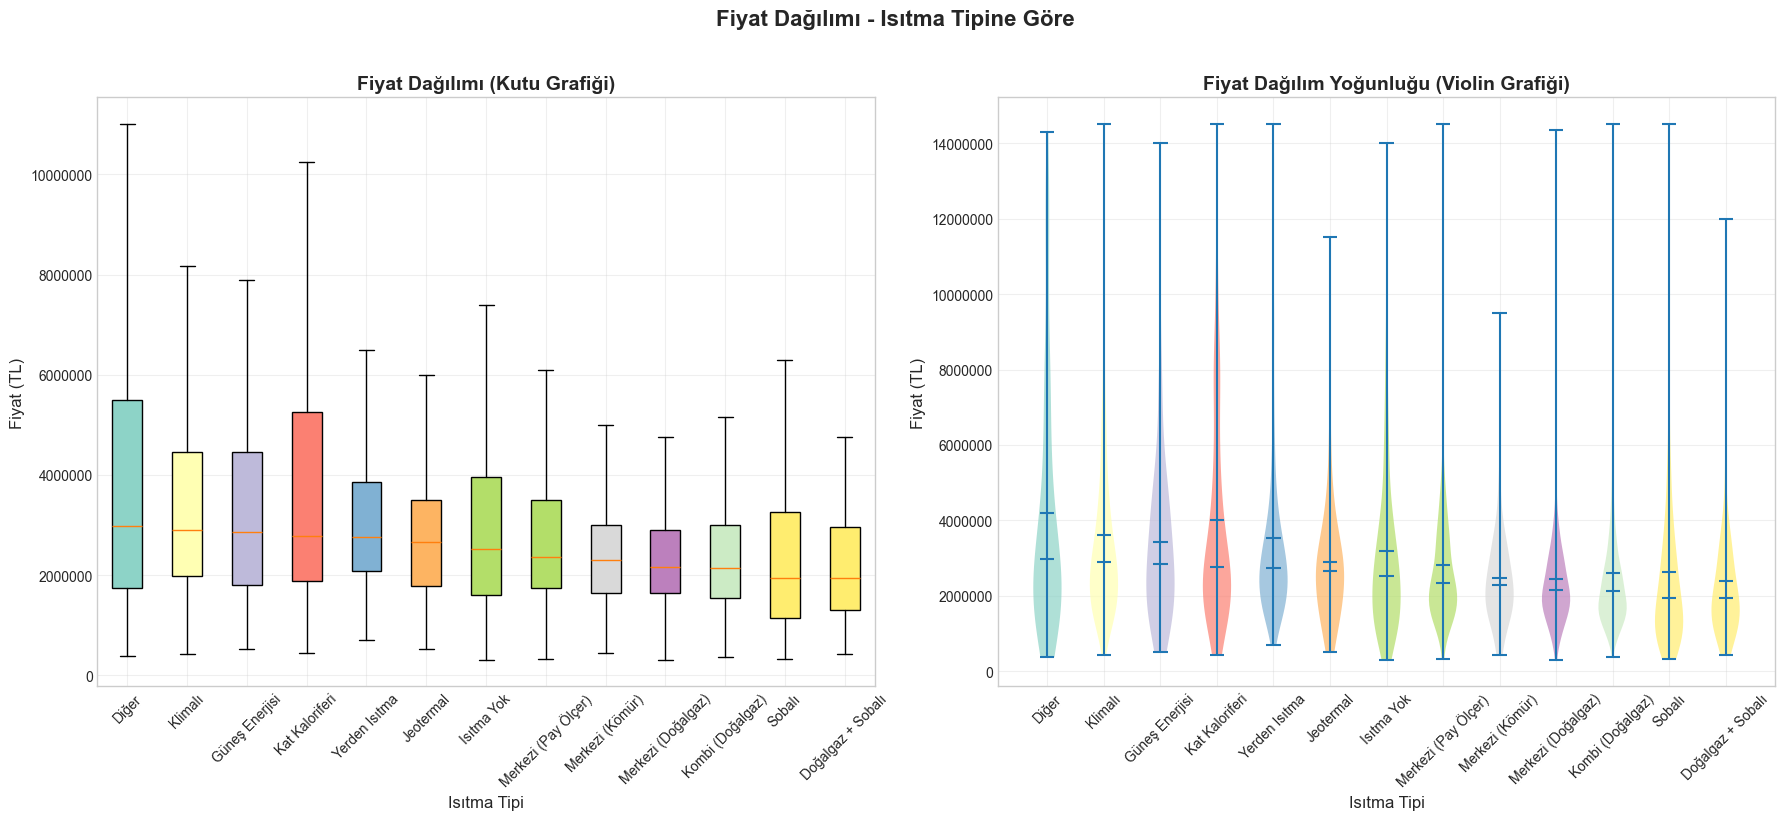

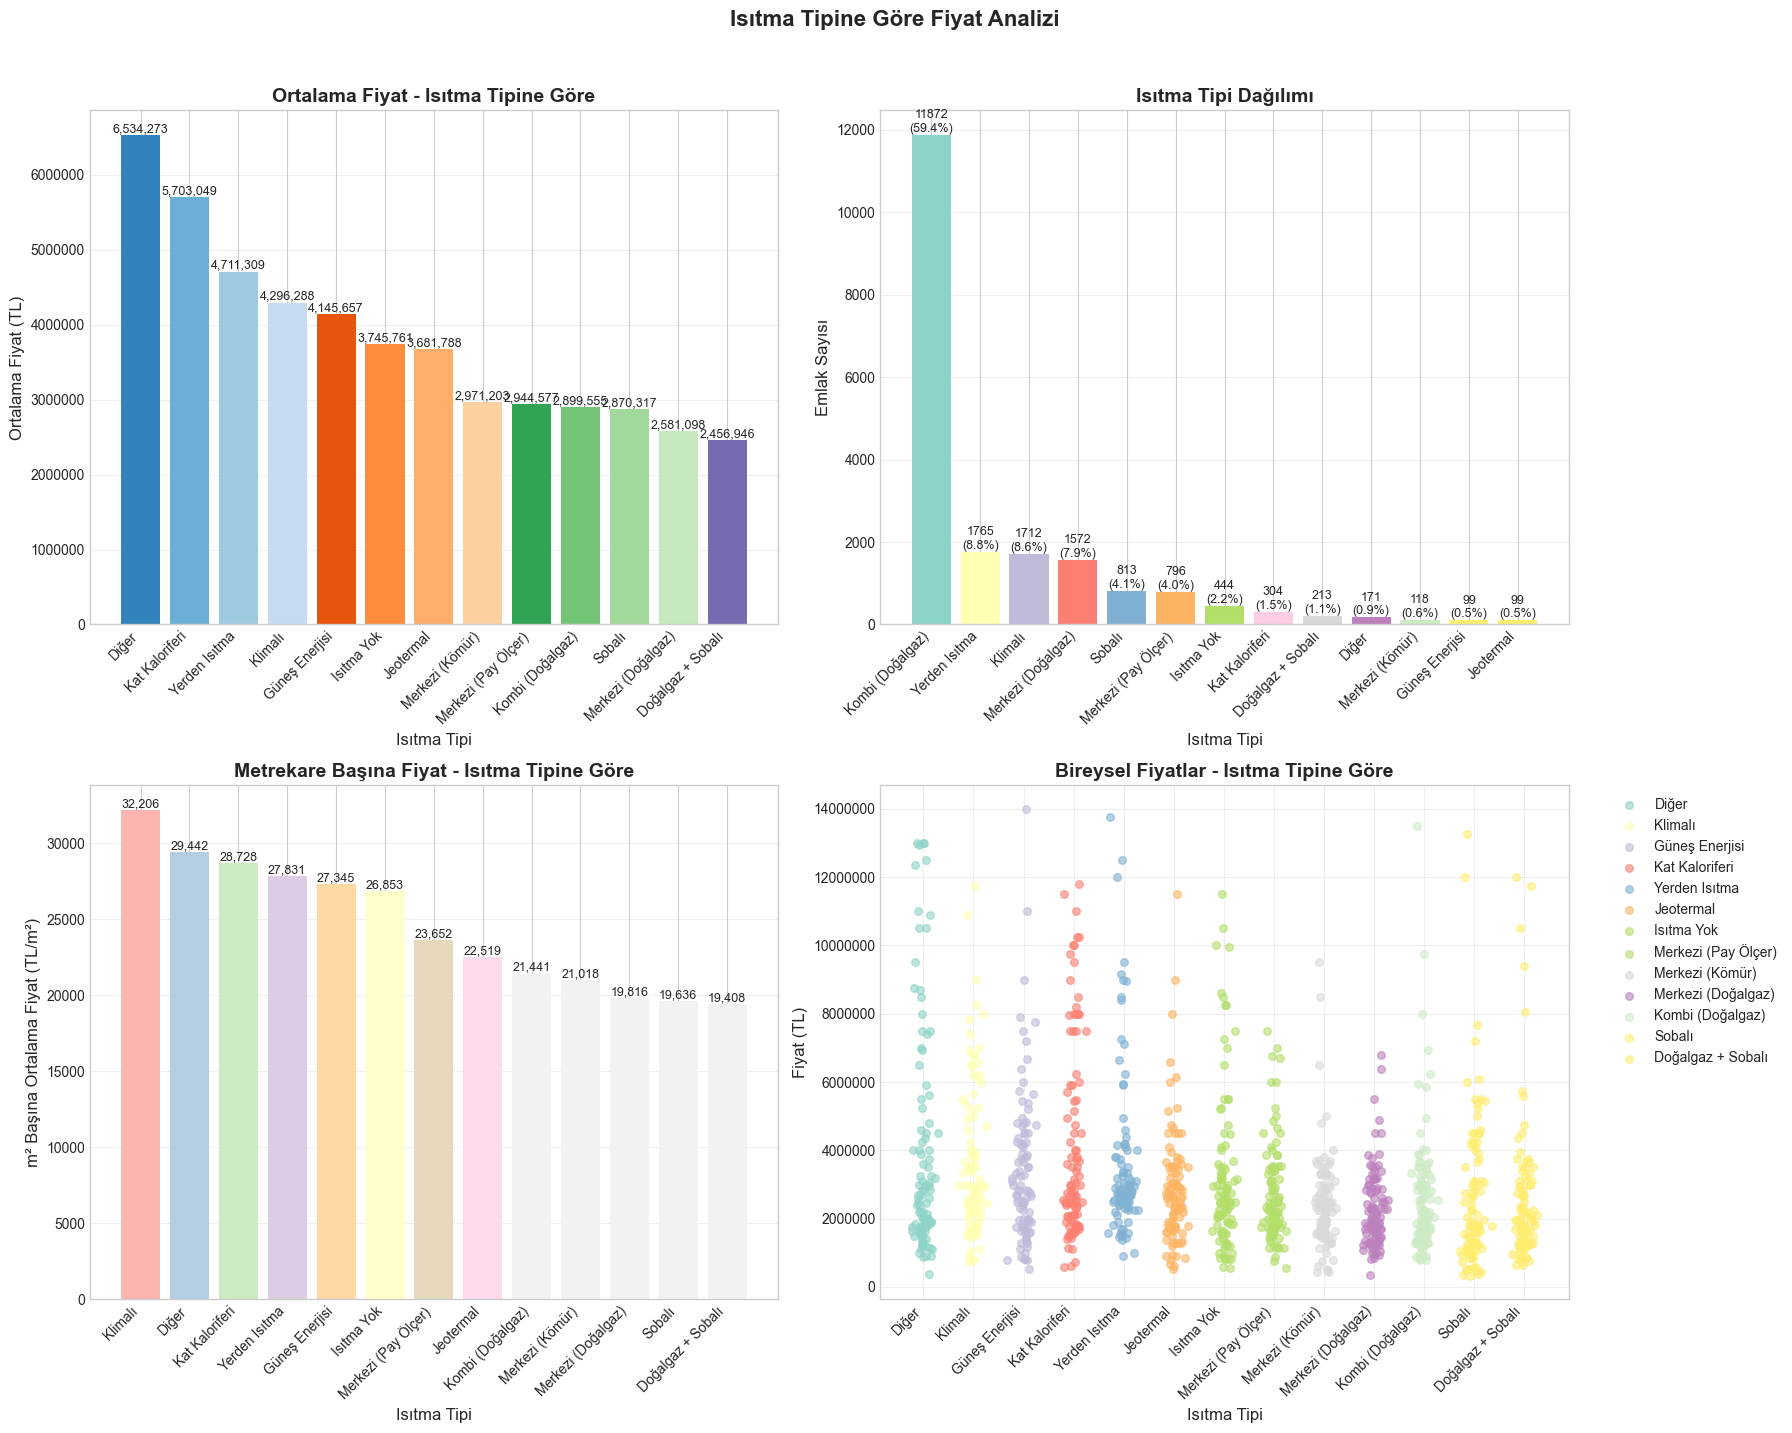

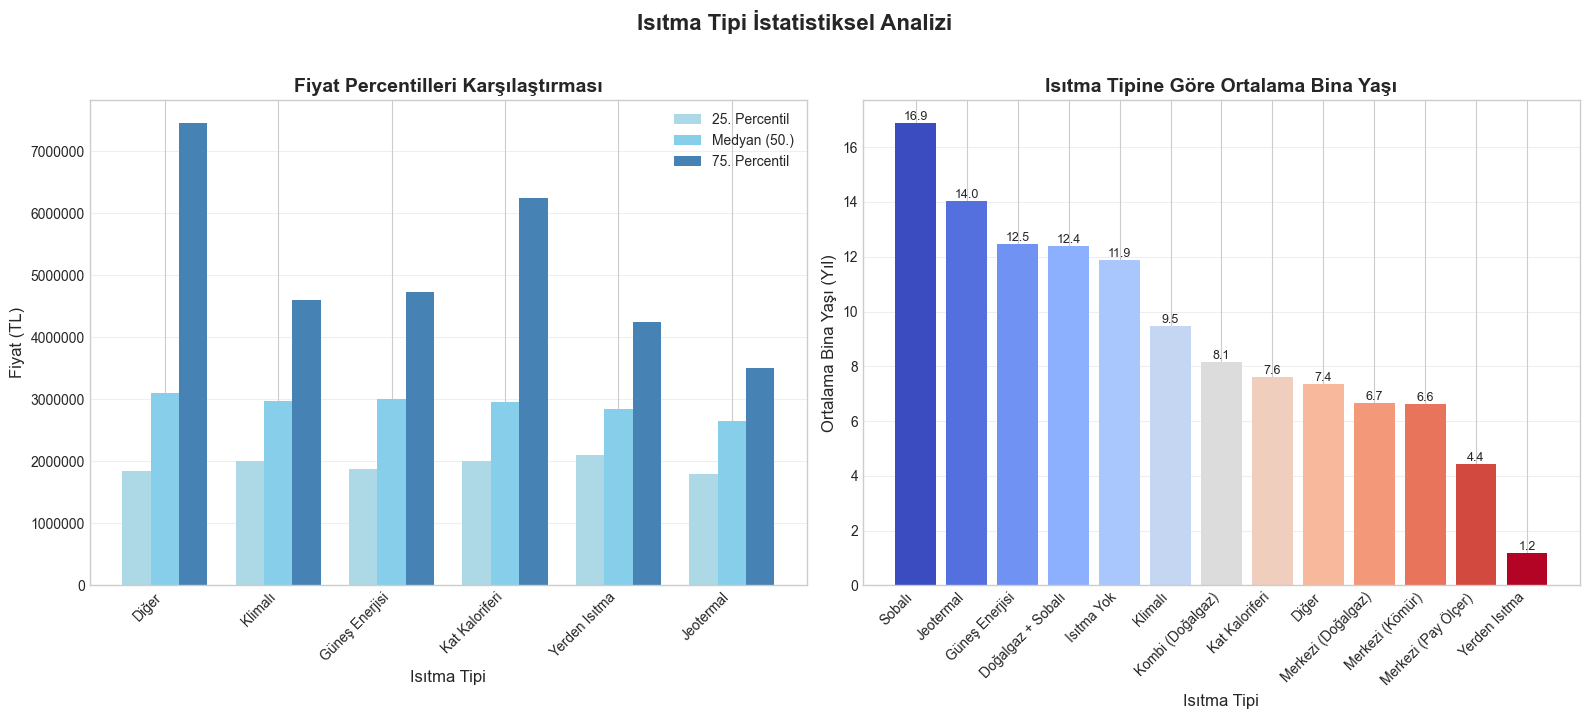

In [23]:
# heating_type_analysis.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

# Set style for better visuals
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("tab10")

def load_data(filename="outlier_check.csv"):
    """Load and clean the data"""
    try:
        df = pd.read_csv(filename, encoding='utf-8-sig')
        print(f"✓ Loaded data from {filename}")
        print(f"✓ Dataset shape: {df.shape}")
        return df
    except Exception as e:
        print(f"Error loading file: {e}")
        return None

def clean_heating_data(df):
    """Clean and standardize the Isıtma_Tipi column"""
    df_clean = df.copy()
    
    # Create a clean version of heating type
    df_clean['Isıtma_Tipi_Clean'] = df_clean['Isıtma_Tipi'].astype(str).str.strip()
    
    # Standardize similar heating types
    heating_standardization = {
        'Kombi Doğalgaz': 'Kombi (Doğalgaz)',
        'Merkezi Doğalgaz': 'Merkezi (Doğalgaz)',
        'Merkezi (Pay Ölçer)': 'Merkezi (Pay Ölçer)',
        'Klimalı': 'Klimalı',
        'Sobalı': 'Sobalı',
        'Doğalgaz Sobalı': 'Doğalgaz + Sobalı',
        'Isıtma Yok': 'Isıtma Yok',
        'Yerden Isıtma': 'Yerden Isıtma',
        'Güneş Enerjisi': 'Güneş Enerjisi',
        'Kat Kaloriferi': 'Kat Kaloriferi',
        'Diğer': 'Diğer',
        'Jeotermal': 'Jeotermal',
        'Merkezi Kömür': 'Merkezi (Kömür)'
    }
    
    # Apply standardization
    df_clean['Isıtma_Tipi_Standard'] = df_clean['Isıtma_Tipi_Clean'].map(
        lambda x: heating_standardization.get(x, 'Diğer') if x in heating_standardization else 'Diğer'
    )
    
    return df_clean

def analyze_heating_types(df_clean, price_col='Fiyat'):
    """
    Analyze the relationship between heating types and price
    """
    print("\n" + "="*70)
    print("HEATING TYPE ANALYSIS")
    print("="*70)
    
    # Check if we have price data
    if price_col not in df_clean.columns:
        # Try to find price column
        price_keywords = ['fiyat', 'price', 'cost', 'value']
        for col in df_clean.columns:
            if any(keyword in str(col).lower() for keyword in price_keywords):
                price_col = col
                print(f"✓ Found price column: '{price_col}'")
                break
    
    if price_col not in df_clean.columns:
        print(f"\n❌ ERROR: Could not find price column.")
        return None, None
    
    # Convert price to numeric if needed
    if df_clean[price_col].dtype == 'object':
        df_clean[price_col] = pd.to_numeric(df_clean[price_col].astype(str).str.replace(',', '').str.replace('.', ''), errors='coerce')
    
    # Remove rows with missing or zero prices/heating types
    mask = (df_clean[price_col].notna() & 
            (df_clean[price_col] > 0) & 
            (df_clean['Isıtma_Tipi_Standard'].notna()) &
            (df_clean['Isıtma_Tipi_Standard'] != 'nan'))
    
    df_analysis = df_clean[mask].copy()
    
    print(f"\n✓ Data after cleaning:")
    print(f"  Total properties: {len(df_analysis)}")
    print(f"  Heating types distribution:")
    
    # Get heating type counts
    heating_counts = df_analysis['Isıtma_Tipi_Standard'].value_counts()
    for heating_type, count in heating_counts.items():
        percentage = (count / len(df_analysis)) * 100
        print(f"    {heating_type}: {count} properties ({percentage:.1f}%)")
    
    return df_analysis, price_col

def create_heating_visualizations(df_analysis, price_col='Fiyat'):
    """
    Create comprehensive visualizations for heating type vs price
    """
    # Create output folder
    output_folder = "heating_analysis"
    Path(output_folder).mkdir(exist_ok=True)
    
    # 1. Price statistics by heating type
    print("\n" + "="*70)
    print("PRICE STATISTICS BY HEATING TYPE")
    print("="*70)
    
    stats_by_heating = df_analysis.groupby('Isıtma_Tipi_Standard')[price_col].agg([
        ('count', 'count'),
        ('mean', lambda x: f"{x.mean():,.0f} TL"),
        ('median', lambda x: f"{x.median():,.0f} TL"),
        ('min', lambda x: f"{x.min():,.0f} TL"),
        ('max', lambda x: f"{x.max():,.0f} TL"),
        ('std_dev', lambda x: f"{x.std():,.0f} TL")
    ]).sort_values('count', ascending=False)
    
    print("\n" + stats_by_heating.to_string())
    
    # 2. Create visualizations
    
    # Figure 1: Price Distribution by Heating Type (Box Plot)
    fig1, axes1 = plt.subplots(1, 2, figsize=(18, 8))
    fig1.suptitle('Fiyat Dağılımı - Isıtma Tipine Göre', fontsize=16, fontweight='bold', y=1.02)
    
    # Box plot (remove extreme outliers for better visualization)
    ax1 = axes1[0]
    # Filter to remove extreme outliers (top 2%)
    price_q98 = df_analysis[price_col].quantile(0.98)
    df_filtered = df_analysis[df_analysis[price_col] <= price_q98]
    
    # Order heating types by median price
    heating_order = df_filtered.groupby('Isıtma_Tipi_Standard')[price_col].median().sort_values(ascending=False).index
    
    boxplot = ax1.boxplot([df_filtered[df_filtered['Isıtma_Tipi_Standard'] == h_type][price_col].values 
                          for h_type in heating_order],
                         labels=heating_order,
                         patch_artist=True,
                         showfliers=False)  # Don't show individual outliers
    
    # Color the boxes
    colors = plt.cm.Set3(np.linspace(0, 1, len(heating_order)))
    for patch, color in zip(boxplot['boxes'], colors):
        patch.set_facecolor(color)
    
    ax1.set_xlabel('Isıtma Tipi', fontsize=12)
    ax1.set_ylabel('Fiyat (TL)', fontsize=12)
    ax1.set_title('Fiyat Dağılımı (Kutu Grafiği)', fontsize=14, fontweight='bold')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, alpha=0.3)
    ax1.ticklabel_format(axis='y', style='plain')
    
    # Violin plot for distribution shape
    ax2 = axes1[1]
    violin_parts = ax2.violinplot([df_filtered[df_filtered['Isıtma_Tipi_Standard'] == h_type][price_col].values 
                                  for h_type in heating_order],
                                 showmeans=True, showmedians=True)
    
    # Color the violins
    for pc, color in zip(violin_parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_alpha(0.7)
    
    ax2.set_xlabel('Isıtma Tipi', fontsize=12)
    ax2.set_ylabel('Fiyat (TL)', fontsize=12)
    ax2.set_title('Fiyat Dağılım Yoğunluğu (Violin Grafiği)', fontsize=14, fontweight='bold')
    ax2.set_xticks(range(1, len(heating_order) + 1))
    ax2.set_xticklabels(heating_order, rotation=45)
    ax2.grid(True, alpha=0.3)
    ax2.ticklabel_format(axis='y', style='plain')
    
    plt.tight_layout()
    fig1.savefig(f'{output_folder}/heating_price_distribution.png', dpi=300, bbox_inches='tight')
    print(f"\n✓ Saved: {output_folder}/heating_price_distribution.png")
    
    # Figure 2: Average Price and Count by Heating Type
    fig2, axes2 = plt.subplots(2, 2, figsize=(18, 14))
    fig2.suptitle('Isıtma Tipine Göre Fiyat Analizi', fontsize=16, fontweight='bold', y=1.02)
    
    # 2A: Bar chart of average price by heating type
    ax2a = axes2[0, 0]
    avg_price_by_heating = df_analysis.groupby('Isıtma_Tipi_Standard')[price_col].mean().sort_values(ascending=False)
    
    bars = ax2a.bar(range(len(avg_price_by_heating)), avg_price_by_heating.values, 
                   color=plt.cm.tab20c(np.arange(len(avg_price_by_heating))))
    ax2a.set_xlabel('Isıtma Tipi', fontsize=12)
    ax2a.set_ylabel('Ortalama Fiyat (TL)', fontsize=12)
    ax2a.set_title('Ortalama Fiyat - Isıtma Tipine Göre', fontsize=14, fontweight='bold')
    ax2a.set_xticks(range(len(avg_price_by_heating)))
    ax2a.set_xticklabels(avg_price_by_heating.index, rotation=45, ha='right')
    ax2a.ticklabel_format(axis='y', style='plain')
    ax2a.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, (bar, value) in enumerate(zip(bars, avg_price_by_heating.values)):
        height = bar.get_height()
        ax2a.text(bar.get_x() + bar.get_width()/2., height,
                 f'{value:,.0f}',
                 ha='center', va='bottom', fontsize=9)
    
    # 2B: Property count by heating type
    ax2b = axes2[0, 1]
    heating_counts = df_analysis['Isıtma_Tipi_Standard'].value_counts().sort_values(ascending=False)
    
    bars2 = ax2b.bar(range(len(heating_counts)), heating_counts.values,
                    color=plt.cm.Set3(np.arange(len(heating_counts))))
    ax2b.set_xlabel('Isıtma Tipi', fontsize=12)
    ax2b.set_ylabel('Emlak Sayısı', fontsize=12)
    ax2b.set_title('Isıtma Tipi Dağılımı', fontsize=14, fontweight='bold')
    ax2b.set_xticks(range(len(heating_counts)))
    ax2b.set_xticklabels(heating_counts.index, rotation=45, ha='right')
    ax2b.grid(True, alpha=0.3, axis='y')
    
    # Add percentage labels
    total = heating_counts.sum()
    for i, (bar, count) in enumerate(zip(bars2, heating_counts.values)):
        height = bar.get_height()
        percentage = (count / total) * 100
        ax2b.text(bar.get_x() + bar.get_width()/2., height,
                 f'{count}\n({percentage:.1f}%)',
                 ha='center', va='bottom', fontsize=9)
    
    # 2C: Price per square meter by heating type (if Net_Metrekare exists)
    ax2c = axes2[1, 0]
    if 'Net_Metrekare' in df_analysis.columns:
        # Filter properties with valid area
        mask_area = df_analysis['Net_Metrekare'].notna() & (df_analysis['Net_Metrekare'] > 0)
        df_area = df_analysis[mask_area].copy()
        
        if len(df_area) > 0:
            df_area['Price_per_m2'] = df_area[price_col] / df_area['Net_Metrekare']
            
            # Remove extreme outliers in price per m2
            price_per_m2_q98 = df_area['Price_per_m2'].quantile(0.98)
            df_area = df_area[df_area['Price_per_m2'] <= price_per_m2_q98]
            
            avg_price_m2_by_heating = df_area.groupby('Isıtma_Tipi_Standard')['Price_per_m2'].mean().sort_values(ascending=False)
            
            bars3 = ax2c.bar(range(len(avg_price_m2_by_heating)), avg_price_m2_by_heating.values,
                           color=plt.cm.Pastel1(np.arange(len(avg_price_m2_by_heating))))
            
            ax2c.set_xlabel('Isıtma Tipi', fontsize=12)
            ax2c.set_ylabel('m² Başına Ortalama Fiyat (TL/m²)', fontsize=12)
            ax2c.set_title('Metrekare Başına Fiyat - Isıtma Tipine Göre', fontsize=14, fontweight='bold')
            ax2c.set_xticks(range(len(avg_price_m2_by_heating)))
            ax2c.set_xticklabels(avg_price_m2_by_heating.index, rotation=45, ha='right')
            ax2c.grid(True, alpha=0.3, axis='y')
            
            # Add value labels
            for i, (bar, value) in enumerate(zip(bars3, avg_price_m2_by_heating.values)):
                height = bar.get_height()
                ax2c.text(bar.get_x() + bar.get_width()/2., height,
                         f'{value:,.0f}',
                         ha='center', va='bottom', fontsize=9)
        else:
            ax2c.text(0.5, 0.5, 'Net_Metrekare verisi yetersiz', 
                     ha='center', va='center', transform=ax2c.transAxes, fontsize=12)
    else:
        ax2c.text(0.5, 0.5, 'Net_Metrekare sütunu bulunamadı', 
                 ha='center', va='center', transform=ax2c.transAxes, fontsize=12)
    
    # 2D: Price vs Heating Type (Swarm/Strip plot)
    ax2d = axes2[1, 1]
    
    # Take a sample for better visualization if dataset is large
    if len(df_filtered) > 1000:
        df_sample = df_filtered.groupby('Isıtma_Tipi_Standard').apply(
            lambda x: x.sample(min(100, len(x)), random_state=42)
        ).reset_index(drop=True)
    else:
        df_sample = df_filtered
    
    # Create strip plot with jitter
    for i, h_type in enumerate(heating_order):
        h_data = df_sample[df_sample['Isıtma_Tipi_Standard'] == h_type]
        if len(h_data) > 0:
            jitter = np.random.normal(i, 0.1, size=len(h_data))
            ax2d.scatter(jitter, h_data[price_col], 
                        alpha=0.6, s=30, label=h_type,
                        color=colors[i % len(colors)])
    
    ax2d.set_xlabel('Isıtma Tipi', fontsize=12)
    ax2d.set_ylabel('Fiyat (TL)', fontsize=12)
    ax2d.set_title('Bireysel Fiyatlar - Isıtma Tipine Göre', fontsize=14, fontweight='bold')
    ax2d.set_xticks(range(len(heating_order)))
    ax2d.set_xticklabels(heating_order, rotation=45, ha='right')
    ax2d.ticklabel_format(axis='y', style='plain')
    ax2d.grid(True, alpha=0.3)
    ax2d.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    fig2.savefig(f'{output_folder}/heating_price_comparison.png', dpi=300, bbox_inches='tight')
    print(f"✓ Saved: {output_folder}/heating_price_comparison.png")
    
    # Figure 3: Statistical Analysis
    fig3, axes3 = plt.subplots(1, 2, figsize=(16, 7))
    fig3.suptitle('Isıtma Tipi İstatistiksel Analizi', fontsize=16, fontweight='bold', y=1.02)
    
    # 3A: Price percentile comparison
    ax3a = axes3[0]
    percentile_data = []
    labels = []
    
    for h_type in heating_order[:6]:  # Top 6 heating types
        h_prices = df_analysis[df_analysis['Isıtma_Tipi_Standard'] == h_type][price_col]
        if len(h_prices) >= 10:  # Only include if enough data
            percentiles = np.percentile(h_prices, [25, 50, 75])
            percentile_data.append(percentiles)
            labels.append(h_type)
    
    if percentile_data:
        percentile_data = np.array(percentile_data)
        x_pos = np.arange(len(labels))
        width = 0.25
        
        ax3a.bar(x_pos - width, percentile_data[:, 0], width, label='25. Percentil', color='lightblue')
        ax3a.bar(x_pos, percentile_data[:, 1], width, label='Medyan (50.)', color='skyblue')
        ax3a.bar(x_pos + width, percentile_data[:, 2], width, label='75. Percentil', color='steelblue')
        
        ax3a.set_xlabel('Isıtma Tipi', fontsize=12)
        ax3a.set_ylabel('Fiyat (TL)', fontsize=12)
        ax3a.set_title('Fiyat Percentilleri Karşılaştırması', fontsize=14, fontweight='bold')
        ax3a.set_xticks(x_pos)
        ax3a.set_xticklabels(labels, rotation=45, ha='right')
        ax3a.legend()
        ax3a.grid(True, alpha=0.3, axis='y')
        ax3a.ticklabel_format(axis='y', style='plain')
    
    # 3B: Heating type vs other factors (if available)
    ax3b = axes3[1]
    
    # Check for building age
    if 'Binanın_Yaşı' in df_analysis.columns:
        age_by_heating = df_analysis.groupby('Isıtma_Tipi_Standard')['Binanın_Yaşı'].mean().sort_values(ascending=False)
        
        bars_age = ax3b.bar(range(len(age_by_heating)), age_by_heating.values,
                          color=plt.cm.coolwarm(np.linspace(0, 1, len(age_by_heating))))
        
        ax3b.set_xlabel('Isıtma Tipi', fontsize=12)
        ax3b.set_ylabel('Ortalama Bina Yaşı (Yıl)', fontsize=12)
        ax3b.set_title('Isıtma Tipine Göre Ortalama Bina Yaşı', fontsize=14, fontweight='bold')
        ax3b.set_xticks(range(len(age_by_heating)))
        ax3b.set_xticklabels(age_by_heating.index, rotation=45, ha='right')
        ax3b.grid(True, alpha=0.3, axis='y')
        
        # Add value labels
        for i, (bar, value) in enumerate(zip(bars_age, age_by_heating.values)):
            height = bar.get_height()
            ax3b.text(bar.get_x() + bar.get_width()/2., height,
                     f'{value:.1f}',
                     ha='center', va='bottom', fontsize=9)
    else:
        ax3b.text(0.5, 0.5, 'Ek analiz için veri bulunamadı\n(Binanın_Yaşı vs.)', 
                 ha='center', va='center', transform=ax3b.transAxes, fontsize=12)
    
    plt.tight_layout()
    fig3.savefig(f'{output_folder}/heating_statistical_analysis.png', dpi=300, bbox_inches='tight')
    print(f"✓ Saved: {output_folder}/heating_statistical_analysis.png")
    
    # Create summary report
    create_summary_report(df_analysis, price_col, output_folder)
    
    return heating_counts, avg_price_by_heating

def create_summary_report(df_analysis, price_col, output_folder):
    """Create a text summary report"""
    report_path = f"{output_folder}/heating_analysis_report.txt"
    
    with open(report_path, 'w', encoding='utf-8') as f:
        f.write("="*80 + "\n")
        f.write("ISITMA TIPI ANALIZ RAPORU\n")
        f.write("="*80 + "\n\n")
        
        f.write(f"Toplam Emlak Sayısı: {len(df_analysis)}\n")
        f.write(f"Analiz Tarihi: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M')}\n\n")
        
        f.write("ISITMA TIPI DAĞILIMI:\n")
        f.write("-"*40 + "\n")
        heating_counts = df_analysis['Isıtma_Tipi_Standard'].value_counts()
        for heating_type, count in heating_counts.items():
            percentage = (count / len(df_analysis)) * 100
            f.write(f"{heating_type:30} {count:5} emlak ({percentage:5.1f}%)\n")
        
        f.write("\nFIYAT ISTATISTIKLERI (Isıtma Tipine Göre):\n")
        f.write("-"*80 + "\n")
        
        stats = df_analysis.groupby('Isıtma_Tipi_Standard')[price_col].agg(['count', 'mean', 'median', 'min', 'max', 'std'])
        stats = stats.sort_values('mean', ascending=False)
        
        for heating_type, row in stats.iterrows():
            f.write(f"\n{heating_type}:\n")
            f.write(f"  Sayı:           {int(row['count'])}\n")
            f.write(f"  Ortalama:       {row['mean']:,.0f} TL\n")
            f.write(f"  Medyan:         {row['median']:,.0f} TL\n")
            f.write(f"  Minimum:        {row['min']:,.0f} TL\n")
            f.write(f"  Maksimum:      {row['max']:,.0f} TL\n")
            f.write(f"  Standart Sapma: {row['std']:,.0f} TL\n")
        
        f.write("\n" + "="*80 + "\n")
        f.write("ÖNEMLI BULGULAR:\n")
        f.write("="*80 + "\n\n")
        
        # Find the most expensive heating type
        most_expensive = stats['mean'].idxmax()
        avg_price_most_expensive = stats.loc[most_expensive, 'mean']
        
        # Find the least expensive heating type (with sufficient data)
        stats_sufficient = stats[stats['count'] >= 10]
        if len(stats_sufficient) > 0:
            least_expensive = stats_sufficient['mean'].idxmin()
            avg_price_least_expensive = stats.loc[least_expensive, 'mean']
            price_difference = ((avg_price_most_expensive - avg_price_least_expensive) / avg_price_least_expensive) * 100
            
            f.write(f"1. En pahalı ısıtma tipi: {most_expensive}\n")
            f.write(f"   Ortalama fiyat: {avg_price_most_expensive:,.0f} TL\n")
            f.write(f"\n2. En ekonomik ısıtma tipi: {least_expensive}\n")
            f.write(f"   Ortalama fiyat: {avg_price_least_expensive:,.0f} TL\n")
            f.write(f"\n3. Fiyat farkı: %{price_difference:.1f}\n")
        
        # Most common heating type
        most_common = heating_counts.idxmax()
        f.write(f"\n4. En yaygın ısıtma tipi: {most_common}\n")
        f.write(f"   Piyasa payı: {(heating_counts[most_common] / len(df_analysis) * 100):.1f}%\n")
        
        f.write("\n" + "="*80 + "\n")
        f.write("TAVSİYELER:\n")
        f.write("="*80 + "\n\n")
        
        f.write("1. Yatırım açısından:\n")
        f.write("   - {} sistemli evler premium segmenti temsil ediyor.\n".format(most_expensive))
        f.write("   - {} daha ekonomik seçenekler sunuyor.\n".format(least_expensive if 'least_expensive' in locals() else "Bazı ısıtma tipleri"))
        
        f.write("\n2. Piyasa analizi:\n")
        f.write("   - Piyasanın %{:.1f}'i {} sistemlerini tercih ediyor.\n".format(
            (heating_counts[most_common] / len(df_analysis) * 100), most_common))
        
        if 'Net_Metrekare' in df_analysis.columns:
            mask = df_analysis['Net_Metrekare'].notna() & (df_analysis['Net_Metrekare'] > 0)
            if mask.any():
                df_m2 = df_analysis[mask].copy()
                df_m2['Price_per_m2'] = df_m2[price_col] / df_m2['Net_Metrekare']
                price_m2_by_heating = df_m2.groupby('Isıtma_Tipi_Standard')['Price_per_m2'].mean()
                
                highest_m2 = price_m2_by_heating.idxmax()
                f.write(f"\n3. Metrekare başına fiyat:\n")
                f.write(f"   - En yüksek m² fiyatı: {highest_m2}\n")
    
    print(f"✓ Saved detailed report: {report_path}")

def main():
    """Main function to run the analysis"""
    print("Starting Heating Type Analysis...")
    print("="*70)
    
    # Load data
    df = load_data("outlier_check.csv")
    if df is None:
        print("Could not load data. Exiting.")
        return
    
    # Check if Isıtma_Tipi column exists
    if 'Isıtma_Tipi' not in df.columns:
        print("\n❌ ERROR: 'Isıtma_Tipi' column not found in the dataset.")
        print("Available columns:")
        for col in df.columns:
            print(f"  - '{col}'")
        return
    
    # Clean heating data
    df_clean = clean_heating_data(df)
    
    # Analyze heating types
    df_analysis, price_col = analyze_heating_types(df_clean)
    
    if df_analysis is None:
        print("Analysis failed. Check your data.")
        return
    
    # Create visualizations
    print("\n" + "="*70)
    print("CREATING VISUALIZATIONS...")
    print("="*70)
    
    heating_counts, avg_price_by_heating = create_heating_visualizations(df_analysis, price_col)
    
    print("\n" + "="*70)
    print("ANALYSIS COMPLETE!")
    print("="*70)
    print(f"\n📊 Top 3 most common heating types:")
    for i, (heating_type, count) in enumerate(heating_counts.head(3).items(), 1):
        percentage = (count / len(df_analysis)) * 100
        print(f"  {i}. {heating_type}: {count} properties ({percentage:.1f}%)")
    
    print(f"\n💰 Top 3 most expensive heating types (average price):")
    for i, (heating_type, avg_price) in enumerate(avg_price_by_heating.head(3).items(), 1):
        print(f"  {i}. {heating_type}: {avg_price:,.0f} TL")
    
    print(f"\n📈 All visualizations saved in: heating_analysis/")
    print("📄 Detailed report saved as: heating_analysis/heating_analysis_report.txt")
    
    # Show plots
    plt.show()

if __name__ == "__main__":
    main()